<a href="https://colab.research.google.com/github/dbmum/digit_classification/blob/main/My_digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# My digit classification Program using MNIST & PYTorch

In [ ]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
import random

Define how to take images and normalize them into values between 0 and 1

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

Download the data MNIST to use 
* training set
* validation set

We are splitting the data into batches of 64, so that we can take steps more often with more efficiency.

In [ ]:
trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)
valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/train-images-idx3-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/train-labels-idx1-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/t10k-images-idx3-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/t10k-labels-idx1-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting PATH_TO_STORE_TESTSET/MNIST/raw/train-images-idx3-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting PATH_TO_STORE_TESTSET/MNIST/raw/train-labels-idx1-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting PATH_TO_STORE_TESTSET/MNIST/raw/t10k-images-idx3-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting PATH_TO_STORE_TESTSET/MNIST/raw/t10k-labels-idx1-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw



In [ ]:
input_size = 784
hidden_sizes = [128, 100]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.Sigmoid(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.Sigmoid(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=128, out_features=100, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=100, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


Prepare the model for training

In [ ]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss

loss.backward()

In [ ]:

# for _ in range(5):
#   rand = random.randrange(16)
#   plt.imshow(images[rand].numpy().squeeze(), cmap='gray_r')
#   plt.axis('off')

## Train the network
We will optimize using the stochastic gradient descent (SGD) method, always taking a step towards the local minimum of the cost, allowing the program to refine the weights until it can discern the digits.

* Learning rate (lr) = 0.03 (amount of change that can happen each step)
* momentum = 0.9 (allows nodes to step across uneven gradients easier, and build inertia towards a certain direction)
* epochs = 15

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.03, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.8267236234886306
Epoch 1 - Training loss: 0.2708783403102523
Epoch 2 - Training loss: 0.18831979448813746
Epoch 3 - Training loss: 0.1473742060736616
Epoch 4 - Training loss: 0.12259828103686383
Epoch 5 - Training loss: 0.1051220230843578
Epoch 6 - Training loss: 0.09096500726500109
Epoch 7 - Training loss: 0.08074957296363454
Epoch 8 - Training loss: 0.07229555848199548
Epoch 9 - Training loss: 0.06347533343096715
Epoch 10 - Training loss: 0.05786917956674031
Epoch 11 - Training loss: 0.05173676085920492
Epoch 12 - Training loss: 0.046375914074695
Epoch 13 - Training loss: 0.042907268145500915
Epoch 14 - Training loss: 0.03680129413148448

Training Time (in minutes) = 2.780400804678599


The `view_classify()` function is used to display the input data with the networks prediction stats next to it.

In [ ]:
def view_classify(img, ps, label, predict):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze(), cmap='gray_r')
    ax1.axis('off')
    ax1.set_title('Correct Label = ' + str(label))
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability | Max = ' + str(predict))
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Show some of the predicted outputs for correct predictions

Predicted Digit = 7 | Actual Digit = 7
Predicted Digit = 5 | Actual Digit = 5
Predicted Digit = 7 | Actual Digit = 7
Predicted Digit = 9 | Actual Digit = 9
Predicted Digit = 2 | Actual Digit = 2


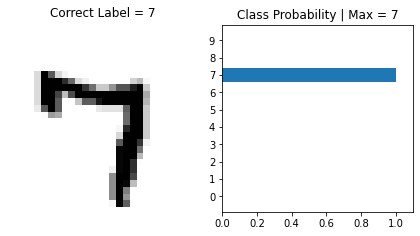

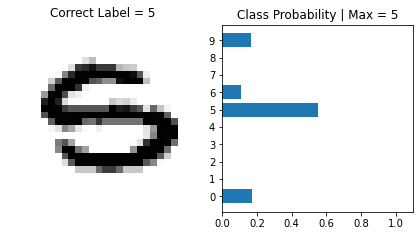

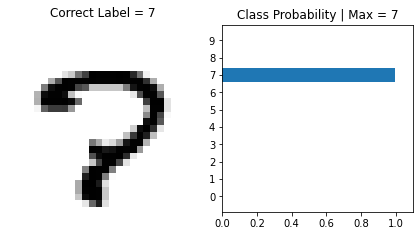

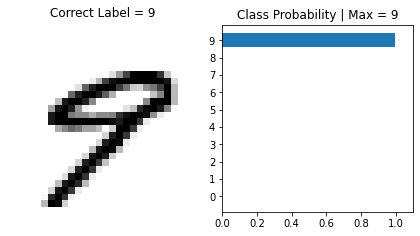

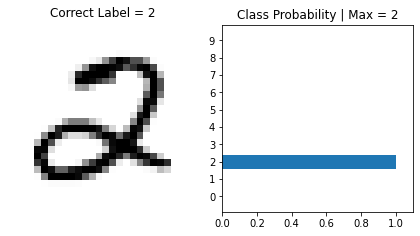

In [ ]:
images, labels = next(iter(valloader))

for i in range(5):
  img = images[i].view(1, 784)
  with torch.no_grad():
      logps = model(img)

  ps = torch.exp(logps)
  probab = list(ps.numpy()[0])
  predicted_label = probab.index(max(probab))
  true_label = labels.numpy()[i]

  if(true_label == predicted_label):
      
    print("Predicted Digit =", probab.index(max(probab)), 
          f"| Actual Digit = {labels[i]}")
    view_classify(img.view(1, 28, 28), ps, true_label, predicted_label)

Show a few examples of numbers that it can not predict correctly

Predicted Digit = 5 | Actual Digit = 9
Predicted Digit = 5 | Actual Digit = 3
Predicted Digit = 9 | Actual Digit = 4
Predicted Digit = 8 | Actual Digit = 6
Predicted Digit = 8 | Actual Digit = 6


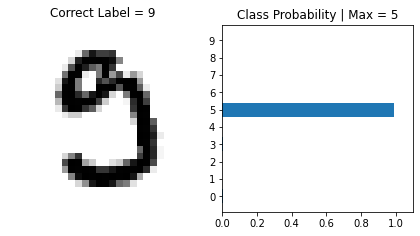

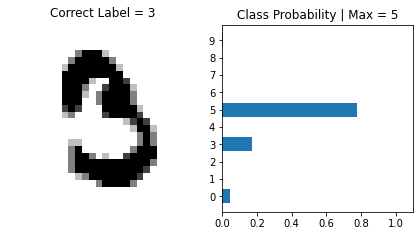

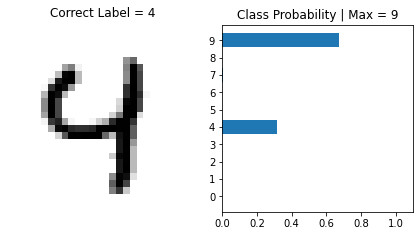

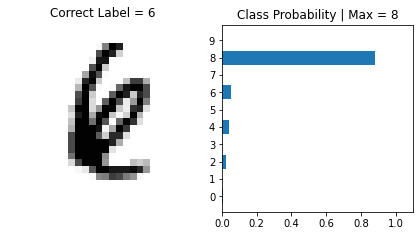

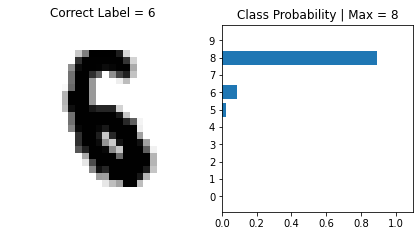

In [ ]:
images, labels = next(iter(valloader))
number_of_incorrect = 0
i = 0

for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    predicted_label = probab.index(max(probab))
    true_label = labels.numpy()[i]

    if(true_label != predicted_label):
        
      print("Predicted Digit =", probab.index(max(probab)), 
            f"| Actual Digit = {labels[i]}")
      view_classify(img.view(1, 28, 28), ps, true_label, predicted_label)
      number_of_incorrect += 1

    if number_of_incorrect >= 5:
      break
    i += 1
  if number_of_incorrect >= 5:
      break

Test the accuracy of our trained model with  

In [ ]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])

    predicted_label = probab.index(max(probab))
    true_label = labels.numpy()[i]

    if(true_label == predicted_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count * 100), "%")

Number Of Images Tested = 10000

Model Accuracy = 97.46000000000001 %
